In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('/kaggle/input/playground-series-s5e1/train.csv')

In [16]:
df.shape

(230130, 6)

In [17]:
df.dtypes

id            int64
date         object
country      object
store        object
product      object
num_sold    float64
dtype: object

In [18]:
df['num_sold']=df['num_sold'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [19]:
print(df.isnull().sum())

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64


Given that num_sold is our target variable, and we have a significant number of missing values (8871), dropping rows directly is not recommended, as we would lose a lot of information and data.
Also, since we know that this is time series data, replacing the missing values by mean or median won't be the best approach because it will ignore the temporal nature of the data.
The time series imputation seems like the best approach here. However, we need to explore our data before we choose a very specific approach.

In [20]:
df.head

<bound method NDFrame.head of             id        date    country                 store  \
0            0  2010-01-01     Canada     Discount Stickers   
1            1  2010-01-01     Canada     Discount Stickers   
2            2  2010-01-01     Canada     Discount Stickers   
3            3  2010-01-01     Canada     Discount Stickers   
4            4  2010-01-01     Canada     Discount Stickers   
...        ...         ...        ...                   ...   
230125  230125  2016-12-31  Singapore  Premium Sticker Mart   
230126  230126  2016-12-31  Singapore  Premium Sticker Mart   
230127  230127  2016-12-31  Singapore  Premium Sticker Mart   
230128  230128  2016-12-31  Singapore  Premium Sticker Mart   
230129  230129  2016-12-31  Singapore  Premium Sticker Mart   

                   product  num_sold  
0        Holographic Goose       NaN  
1                   Kaggle     973.0  
2             Kaggle Tiers     906.0  
3                 Kerneler     423.0  
4       Kerneler D

In [22]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [24]:
df

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


In [27]:
df['num_sold'].isnull()

0          True
1         False
2         False
3         False
4         False
          ...  
230125    False
230126    False
230127    False
230128    False
230129    False
Name: num_sold, Length: 230130, dtype: bool

In [25]:
missing_rows = df[df['num_sold'].isnull()]

In [26]:
missing_rows

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
45,45,2010-01-01,Kenya,Discount Stickers,Holographic Goose,NaN
90,90,2010-01-02,Canada,Discount Stickers,Holographic Goose,NaN
135,135,2010-01-02,Kenya,Discount Stickers,Holographic Goose,NaN
180,180,2010-01-03,Canada,Discount Stickers,Holographic Goose,NaN
...,...,...,...,...,...,...
229905,229905,2016-12-29,Kenya,Discount Stickers,Holographic Goose,NaN
229950,229950,2016-12-30,Canada,Discount Stickers,Holographic Goose,NaN
229995,229995,2016-12-30,Kenya,Discount Stickers,Holographic Goose,NaN
230040,230040,2016-12-31,Canada,Discount Stickers,Holographic Goose,NaN


In [28]:
missing_rows['missing']=True

<ipython-input-28-b96fc9b57705>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_rows['missing']=True


In [29]:
missing_rows

,id,date,country,store,product,num_sold,missing
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN,True
45,45,2010-01-01,Kenya,Discount Stickers,Holographic Goose,NaN,True
90,90,2010-01-02,Canada,Discount Stickers,Holographic Goose,NaN,True
135,135,2010-01-02,Kenya,Discount Stickers,Holographic Goose,NaN,True
180,180,2010-01-03,Canada,Discount Stickers,Holographic Goose,NaN,True
...,...,...,...,...,...,...,...
229905,229905,2016-12-29,Kenya,Discount Stickers,Holographic Goose,NaN,True
229950,229950,2016-12-30,Canada,Discount Stickers,Holographic Goose,NaN,True
229995,229995,2016-12-30,Kenya,Discount Stickers,Holographic Goose,NaN,True
230040,230040,2016-12-31,Canada,Discount Stickers,Holographic Goose,NaN,True


In [30]:
df_missing = df.merge(missing_rows[['date','country','store','product','missing']],on=['date','country','store','product'],how='left')

In [31]:
df_missing

,id,date,country,store,product,num_sold,missing
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN,True
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,NaN
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,NaN
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,NaN
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,NaN
...,...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0,NaN
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0,NaN
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0,NaN
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0,NaN


In [32]:
df_missing['missing'] = df_missing['missing'].fillna(False)

In [33]:
df_missing

,id,date,country,store,product,num_sold,missing
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN,True
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,False
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,False
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,False
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,False
...,...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0,False
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0,False
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0,False
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0,False


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


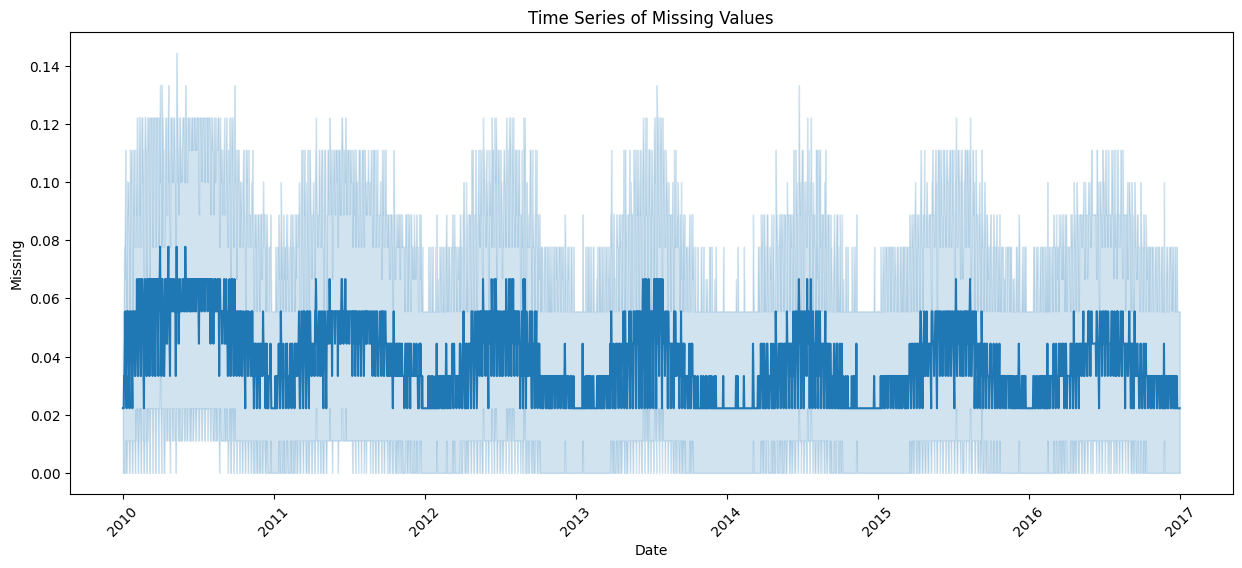

In [34]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='date', y='missing', data=df_missing)
plt.title('Time Series of Missing Values')
plt.xlabel('Date')
plt.ylabel('Missing')
plt.xticks(rotation=45)
plt.show()

In [38]:
df['num_sold'] = df['num_sold'].interpolate(method='slinear')

In [39]:
print(df.isnull().sum())

id          0
date        0
country     0
store       0
product     0
num_sold    1
dtype: int64
